In [1]:
#import library

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

#Read csv file

df = pd.read_csv(r'C:\Users\Nimesh\Desktop\Master Thesis\heart.csv')
x = df.iloc[0:,0:13].values
y = df.iloc[0:,13].values


#split training testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)




In [2]:
#SVM classifier


from sklearn.svm import SVC  

svclassifier = SVC(kernel='linear')  
svclassifier.fit(x_train, y_train)

y_pred = svclassifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix  
print("SVM Classifier")
print(classification_report(y_test,y_pred))

acc=(74+101)/(74+101+24+6)


print('ACCURACY: ',acc)



SVM Classifier
              precision    recall  f1-score   support

           0       0.93      0.76      0.83        98
           1       0.81      0.94      0.87       107

    accuracy                           0.85       205
   macro avg       0.87      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

ACCURACY:  0.8536585365853658


              precision    recall  f1-score   support

           0       0.93      0.76      0.83        98
           1       0.81      0.94      0.87       107

    accuracy                           0.85       205
   macro avg       0.87      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

Random Forest Classifier Accuracy: 88.78%


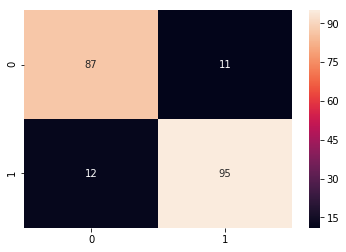

In [3]:
#Random Forest

rfc = RandomForestClassifier(n_estimators = 4, max_depth = 3)

rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
print(classification_report(y_test,y_pred))
print('Random Forest Classifier Accuracy: {:.2f}%'.format(rfc_accuracy*100))
cm = confusion_matrix(y_test,rfc_pred)
sns.heatmap(cm,annot=True);


              precision    recall  f1-score   support

           0       0.93      0.76      0.83        98
           1       0.81      0.94      0.87       107

    accuracy                           0.85       205
   macro avg       0.87      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205

KNeighborsClassifier Accuracy: 84.88%


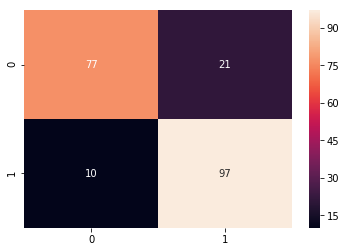

In [4]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 7)  # n_neighbors means k
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(classification_report(y_test,y_pred))
print('KNeighborsClassifier Accuracy: {:.2f}%'.format(knn_accuracy*100))

cm = confusion_matrix(y_test,knn_pred)
sns.heatmap(cm,annot=True);

Naive Bayes Accuracy: 85.37%


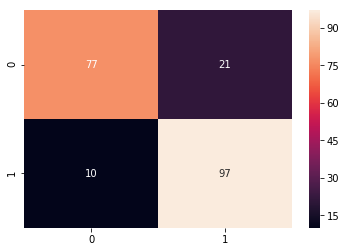

In [5]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print('Naive Bayes Accuracy: {:.2f}%'.format(nb_accuracy*100))
cm_nb = confusion_matrix(y_test,nb_pred)
sns.heatmap(cm,annot=True);


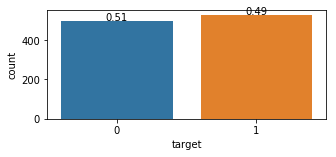

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotTarget():
    sns.countplot(x='target', data=df, ax=ax)
    for i, p in enumerate(ax.patches):
        count=df['target'].value_counts().values[i]
        x=p.get_x()+ p.get_width() /2.
        y=p.get_height() + 3
        label='{:1.2f}'.format(count / float(df.shape[0]))
        ax.text(x, y,label, ha='center')
        
fig_target,ax=plt.subplots(nrows=1, ncols=1, figsize=(5, 2))
plotTarget()

In [8]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(df.drop(['target'], 1))
y = np.array(df['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [9]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

Using TensorFlow backend.
C:\Users\Nimesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Nimesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Nimesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Nimesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

(820, 2)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [10]:
#ADAM

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=300, batch_size=10, verbose = 10)

Train on 820 samples, validate on 205 samples
Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
E

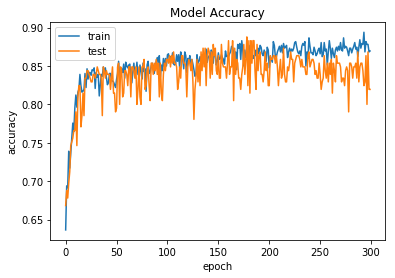

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [13]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)
print('Results for Neural Network Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Neural Network Model
0.8195121951219512
              precision    recall  f1-score   support

           0       0.93      0.69      0.79       102
           1       0.75      0.95      0.84       103

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205



In [14]:
pwd

'C:\\Users\\Nimesh'